In [13]:
# Simulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
sim = pd.read_csv('results/simulation_five_variate_20230321.csv')
# Number of count exactly 499
rho_list = np.array([0,0.3,0.7])
SNR_list = np.array([6.0, 3.52, 2.07, 1.22, 0.71])
summary_count = []
for rho in rho_list:
    for snr in SNR_list:
        counter = 0
        df = sim[(sim.rho==rho)&(sim.SNR==snr)]
        for i, row in df.iterrows():
            if 499 in [int(item) for item in re.findall(r'\d+', row['Change Points'])]:
                counter = counter + 1
        summary_count.append([rho, snr, counter, counter/500])
summary_count

[[0.0, 6.0, 366, 0.732],
 [0.0, 3.52, 265, 0.53],
 [0.0, 2.07, 219, 0.438],
 [0.0, 1.22, 143, 0.286],
 [0.0, 0.71, 97, 0.194],
 [0.3, 6.0, 337, 0.674],
 [0.3, 3.52, 256, 0.512],
 [0.3, 2.07, 195, 0.39],
 [0.3, 1.22, 146, 0.292],
 [0.3, 0.71, 91, 0.182],
 [0.7, 6.0, 324, 0.648],
 [0.7, 3.52, 264, 0.528],
 [0.7, 2.07, 160, 0.32],
 [0.7, 1.22, 112, 0.224],
 [0.7, 0.71, 83, 0.166]]

In [2]:
sim

,Repitition,Time,rho,SNR,n,Optimality Gap,Change Points
0,6,386.690022,0.0,6.00,1000,0.000000,[499]
1,3,464.571500,0.0,6.00,1000,0.000000,[499]
2,5,465.427833,0.0,6.00,1000,0.153970,[499]
3,2,465.880617,0.0,6.00,1000,0.168152,[499]
4,7,465.965340,0.0,6.00,1000,0.154327,[499]
...,...,...,...,...,...,...,...
7495,497,440.471484,0.7,0.71,1000,0.431827,"[462, 471, 534, 714]"
7496,498,429.443668,0.3,0.71,1000,0.321422,"[527, 536]"
7497,499,429.414737,0.3,0.71,1000,0.328125,[499]
7498,498,424.631574,0.7,0.71,1000,0.393311,"[68, 479, 485, 495, 499]"


In [27]:
df = pd.read_csv('results/simulation_five_variate_20230321.csv')

# correct_perfect: detect only 499
df['correct_perfect'] = False
df.loc[df['Change Points'] == "[499]", 'correct_perfect'] = True

# correct partial: result include 499, it might include other change points.
df['correct_partial'] = df["Change Points"].str.count("499")

# the number of change points
df['the number of detected change points'] = df["Change Points"].str.count(",") + 1

# group name
df["group"] = "rho: " + df["rho"].astype(str) + " , SNR: " + df["SNR"].astype(str) + " , n: " + df["n"].astype(str)
df

,Repitition,Time,rho,SNR,n,Optimality Gap,Change Points,correct_perfect,correct_partial,the number of detected change points,group
0,6,386.690022,0.0,6.00,1000,0.000000,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
1,3,464.571500,0.0,6.00,1000,0.000000,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
2,5,465.427833,0.0,6.00,1000,0.153970,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
3,2,465.880617,0.0,6.00,1000,0.168152,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
4,7,465.965340,0.0,6.00,1000,0.154327,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
...,...,...,...,...,...,...,...,...,...,...,...
7495,497,440.471484,0.7,0.71,1000,0.431827,"[462, 471, 534, 714]",False,0,4,"rho: 0.7 , SNR: 0.71 , n: 1000"
7496,498,429.443668,0.3,0.71,1000,0.321422,"[527, 536]",False,0,2,"rho: 0.3 , SNR: 0.71 , n: 1000"
7497,499,429.414737,0.3,0.71,1000,0.328125,[499],True,1,1,"rho: 0.3 , SNR: 0.71 , n: 1000"
7498,498,424.631574,0.7,0.71,1000,0.393311,"[68, 479, 485, 495, 499]",False,1,5,"rho: 0.7 , SNR: 0.71 , n: 1000"


## Accuracy

Findings:

- Higher SNR is, more accurate result is.
- lower rho, more accurate result is.

In [19]:
df_count = df[["rho", "SNR", "n", "correct_perfect", "correct_partial"]].groupby(["rho", "SNR", "n"]).sum().reset_index()
df_count["accuracy_perfect"] = df_count["correct_perfect"]/500
df_count["accuracy_partial"] = df_count["correct_partial"]/500
df_count

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,81,97,0.162,0.194
1,0.0,1.22,1000,121,143,0.242,0.286
2,0.0,2.07,1000,206,219,0.412,0.438
3,0.0,3.52,1000,261,265,0.522,0.530
4,0.0,6.00,1000,364,366,0.728,0.732
5,0.3,0.71,1000,51,91,0.102,0.182
6,0.3,1.22,1000,112,146,0.224,0.292
7,0.3,2.07,1000,164,195,0.328,0.390
8,0.3,3.52,1000,246,256,0.492,0.512
9,0.3,6.00,1000,334,337,0.668,0.674


In [20]:
df_count.sort_values("accuracy_partial", ascending=False)

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
4,0.0,6.00,1000,364,366,0.728,0.732
9,0.3,6.00,1000,334,337,0.668,0.674
14,0.7,6.00,1000,304,324,0.608,0.648
3,0.0,3.52,1000,261,265,0.522,0.530
13,0.7,3.52,1000,231,264,0.462,0.528
8,0.3,3.52,1000,246,256,0.492,0.512
2,0.0,2.07,1000,206,219,0.412,0.438
7,0.3,2.07,1000,164,195,0.328,0.390
12,0.7,2.07,1000,115,160,0.230,0.320
6,0.3,1.22,1000,112,146,0.224,0.292


## Optimality Gap

Findings:

- Large optimality gap is associated with the model performance.

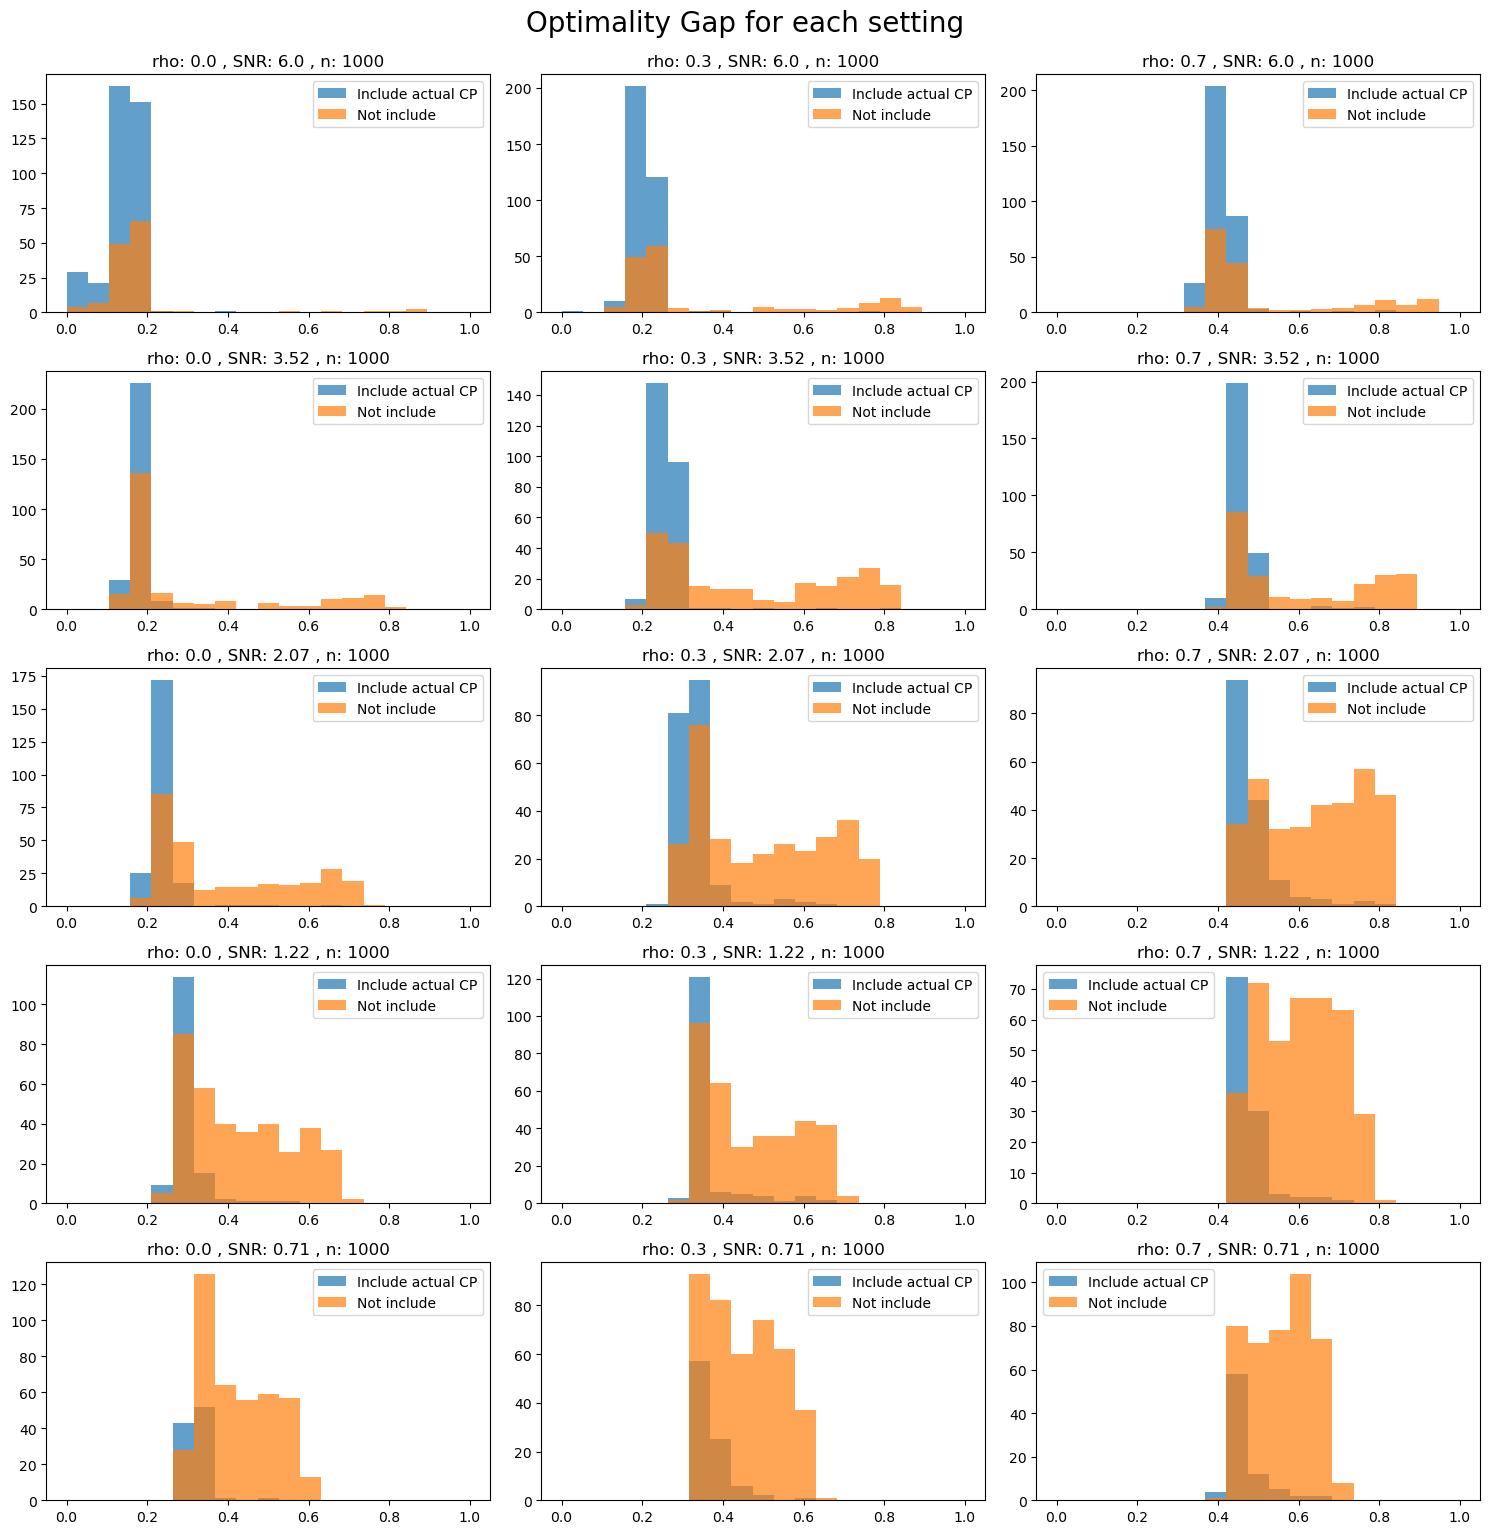

In [76]:
import math

bins = np.linspace(0, 1.0, num=20)

group_list = df["group"].unique()

fig, ax = plt.subplots(5, 3, figsize=(15, 15))

for g, ax in zip(group_list, ax.ravel()):
    ax.hist(df.loc[(df["group"] == g) & (df["correct_partial"] == 1), "Optimality Gap"], bins, label = "Include actual CP", alpha = 0.7)
    ax.hist(df.loc[(df["group"] == g) & (df["correct_partial"] == 0), "Optimality Gap"], bins, label = "Not include", alpha = 0.7)
    ax.legend()
    ax.set_title(g)
    

fig.tight_layout()
fig.suptitle("Optimality Gap for each setting", fontsize=20).set_y(1.02)
plt.show()

## Time

Findings:

- It seems that there is no clear difference in runtime among settings..

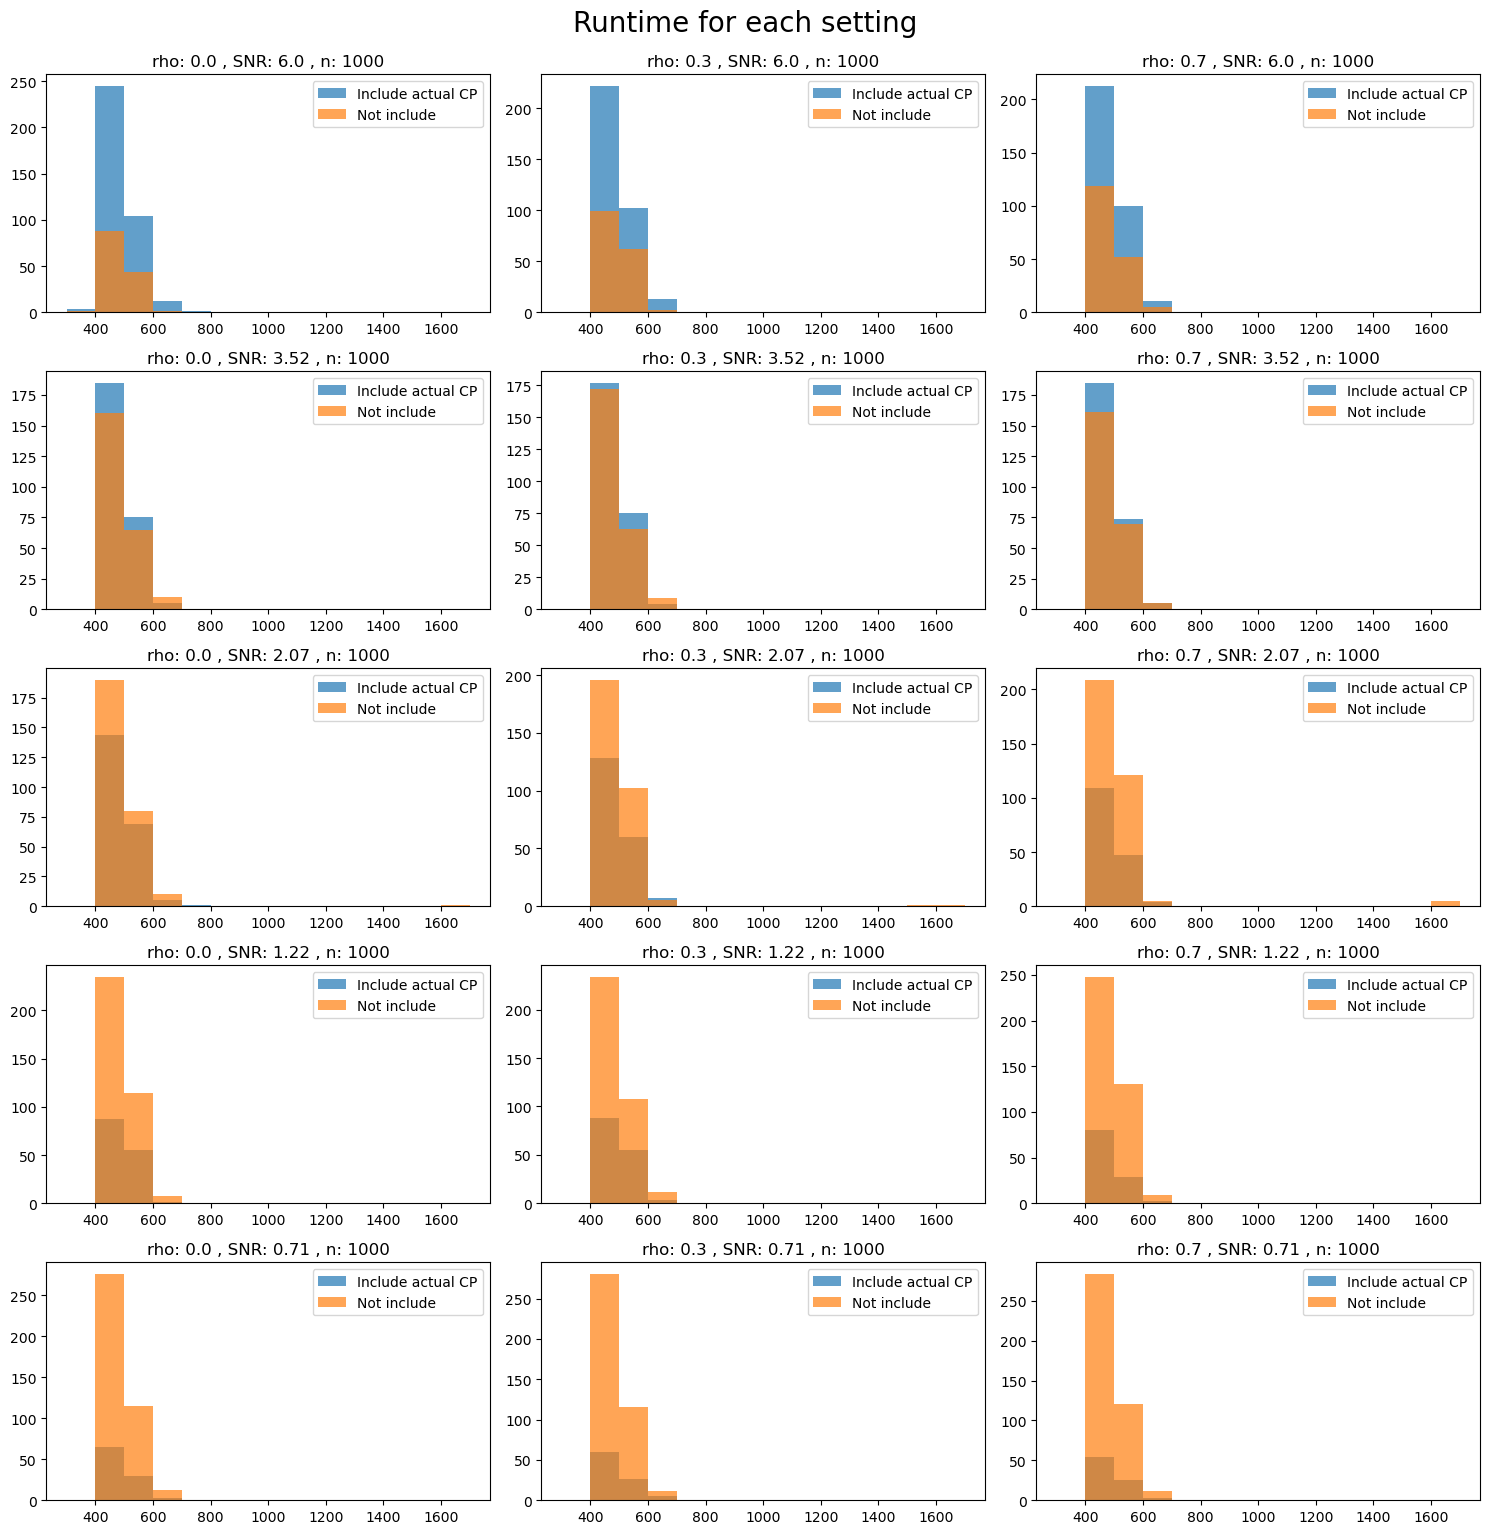

In [84]:
bins = np.linspace(300, 1700, num=15)

group_list = df["group"].unique()

fig, ax = plt.subplots(5, 3, figsize=(15, 15))

for g, ax in zip(group_list, ax.ravel()):
    ax.hist(df.loc[(df["group"] == g) & (df["correct_partial"] == 1), "Time"], bins, label = "Include actual CP", alpha = 0.7)
    ax.hist(df.loc[(df["group"] == g) & (df["correct_partial"] == 0), "Time"], bins, label = "Not include", alpha = 0.7)
    ax.legend()
    ax.set_title(g)
    

fig.tight_layout()
fig.suptitle("Runtime for each setting", fontsize=20).set_y(1.02)
plt.show()

In [85]:
df.Time.min()

345.2270231246948

In [86]:
df.Time.max()

1626.937005996704

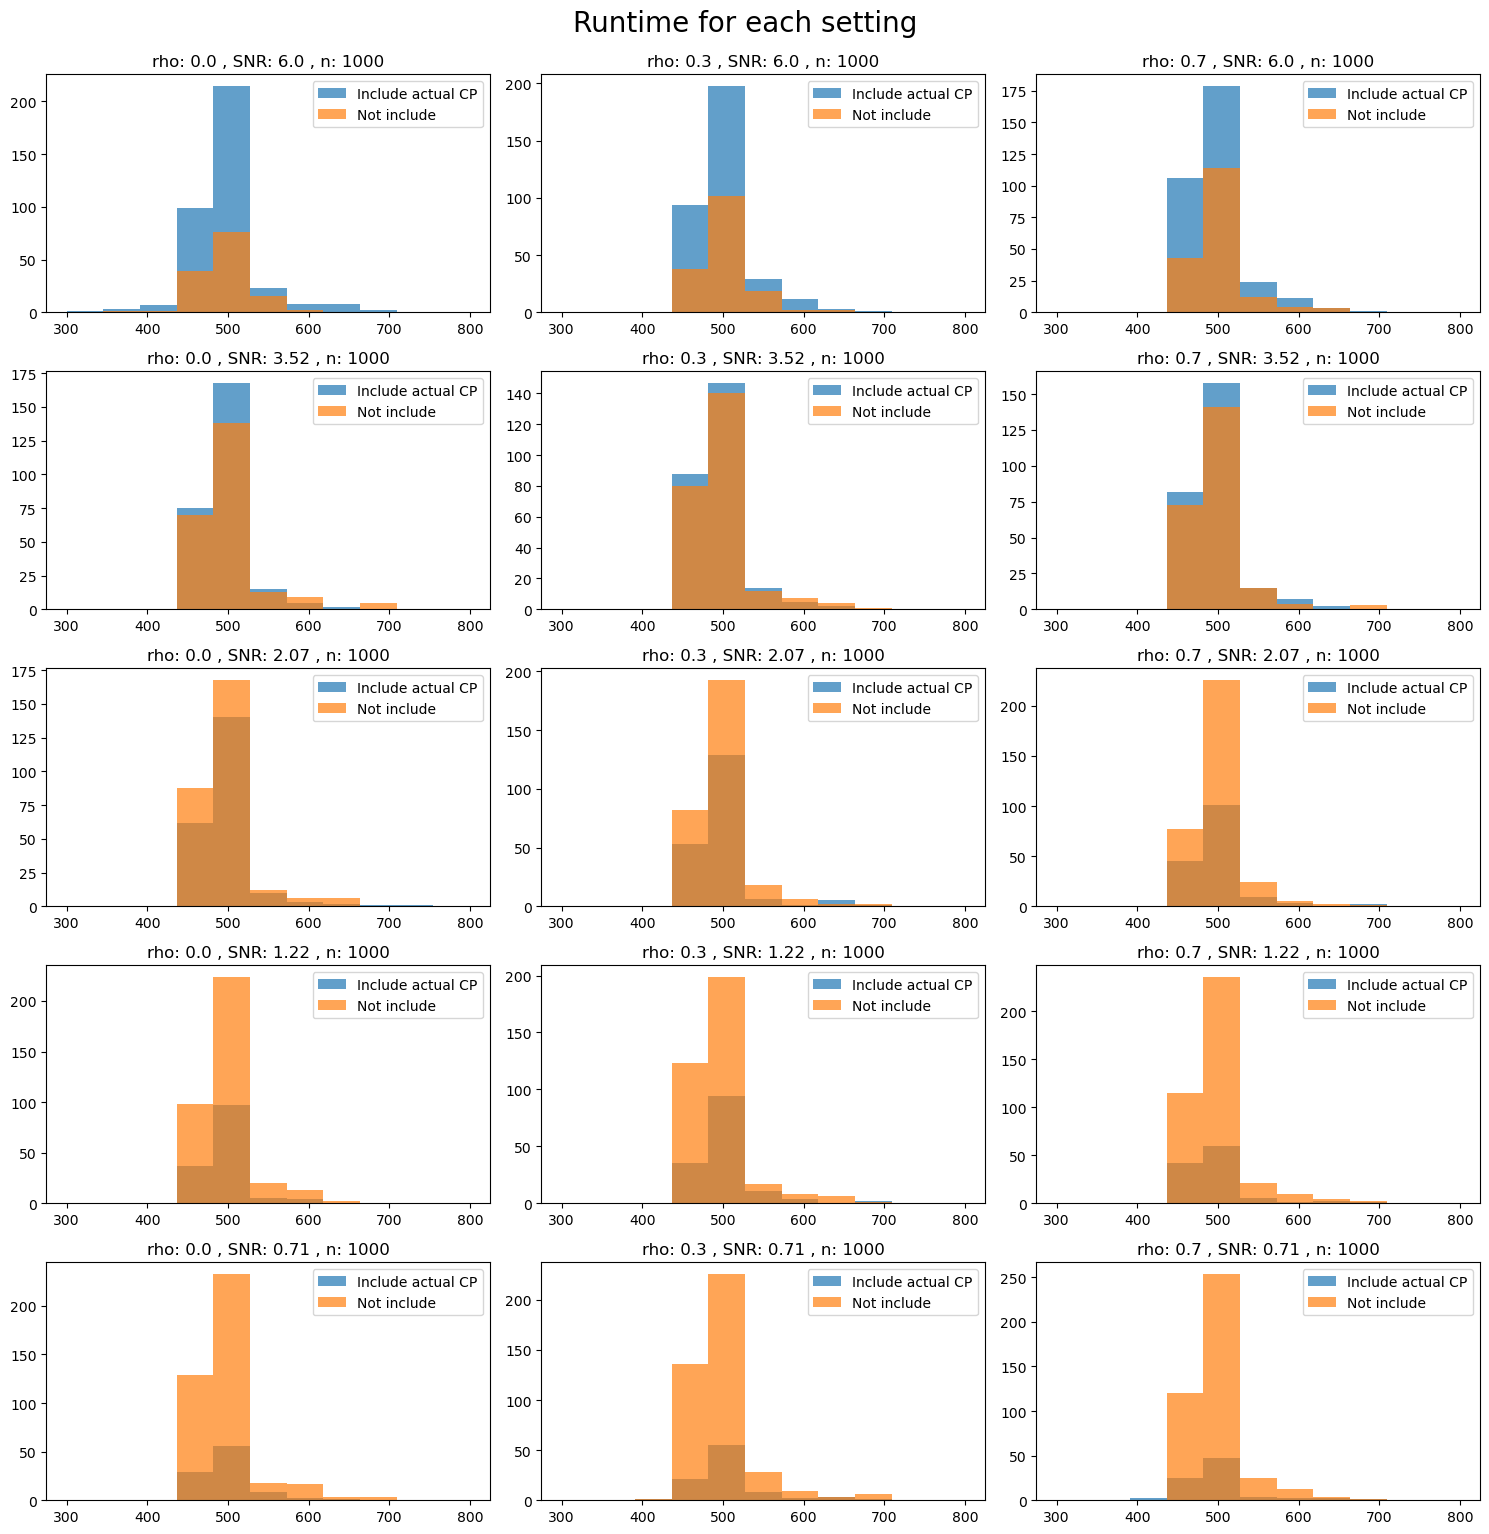

In [87]:
bins = np.linspace(300, 800, num=12)

group_list = df["group"].unique()

fig, ax = plt.subplots(5, 3, figsize=(15, 15))

for g, ax in zip(group_list, ax.ravel()):
    ax.hist(df.loc[(df["group"] == g) & (df["correct_partial"] == 1), "Time"], bins, label = "Include actual CP", alpha = 0.7)
    ax.hist(df.loc[(df["group"] == g) & (df["correct_partial"] == 0), "Time"], bins, label = "Not include", alpha = 0.7)
    ax.legend()
    ax.set_title(g)
    

fig.tight_layout()
fig.suptitle("Runtime for each setting", fontsize=20).set_y(1.02)
plt.show()